# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric' # set metric units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lng = city_weather['coord']['lon']
        city_lat = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all'] # cloudiness %
        city_wind = city_weather['wind']['speed'] # wind speed (I checked the example table)
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] # Time of the forecasted data, Unix, UTC

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | kasane
Processing Record 3 of Set 1 | savave village
City not found. Skipping...
Processing Record 4 of Set 1 | maloye ganyushkino
Processing Record 5 of Set 1 | beaufort west
Processing Record 6 of Set 1 | agat village
Processing Record 7 of Set 1 | berezna
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | koulikoro
Processing Record 11 of Set 1 | pikalevo
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | nadym
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | haverfordwest
Processing Record 17 of Set 1 | ust-tsilma
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 |

Processing Record 40 of Set 4 | yermentau
Processing Record 41 of Set 4 | adigrat
Processing Record 42 of Set 4 | la porte
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | trujillo
Processing Record 45 of Set 4 | sao jose da coroa grande
Processing Record 46 of Set 4 | morehead city
Processing Record 47 of Set 4 | agnibilekrou
Processing Record 48 of Set 4 | port antonio
Processing Record 49 of Set 4 | sisimiut
Processing Record 0 of Set 5 | eraan
Processing Record 1 of Set 5 | keflavik
Processing Record 2 of Set 5 | veraval
Processing Record 3 of Set 5 | kerikeri
Processing Record 4 of Set 5 | qom
Processing Record 5 of Set 5 | mili
Processing Record 6 of Set 5 | chiavenna
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | mesolongi
Processing Record 9 of Set 5 | vorkuta
Processing Record 10 of Set 5 | hauterive
Processing Record 11 of Set 5 | cockburn town
Processing Record 12 of Set 5 | qal'at bishah
City not found. Skipping...
Processing R

Processing Record 30 of Set 8 | yuci
Processing Record 31 of Set 8 | palu
Processing Record 32 of Set 8 | valdivia
Processing Record 33 of Set 8 | vilyuchinsk
Processing Record 34 of Set 8 | caconda
Processing Record 35 of Set 8 | kiama
Processing Record 36 of Set 8 | yangor
City not found. Skipping...
Processing Record 37 of Set 8 | kolonia town
Processing Record 38 of Set 8 | chibougamau
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | aoulef
Processing Record 41 of Set 8 | vyazemskiy
Processing Record 42 of Set 8 | kuqa
Processing Record 43 of Set 8 | mildura
Processing Record 44 of Set 8 | hithadhoo
Processing Record 45 of Set 8 | katsuura
Processing Record 46 of Set 8 | kill devil hills
Processing Record 47 of Set 8 | portland
Processing Record 48 of Set 8 | tchollire
Processing Record 49 of Set 8 | carora
Processing Record 0 of Set 9 | ormond-by-the-sea
Processing Record 1 of Set 9 | vilyuysk
Processing Record 2 of Set 9 | negotin
Processing Record 3 of

Processing Record 18 of Set 12 | vila franca do campo
Processing Record 19 of Set 12 | serdar
Processing Record 20 of Set 12 | sontra
Processing Record 21 of Set 12 | cairns city
City not found. Skipping...
Processing Record 22 of Set 12 | pimentel
Processing Record 23 of Set 12 | mokhsogollokh
Processing Record 24 of Set 12 | joshimath
Processing Record 25 of Set 12 | bryne
Processing Record 26 of Set 12 | ndele
Processing Record 27 of Set 12 | masterton
Processing Record 28 of Set 12 | sao miguel
Processing Record 29 of Set 12 | qarazhal
Processing Record 30 of Set 12 | coursan
Processing Record 31 of Set 12 | ta`u
Processing Record 32 of Set 12 | kalabo
Processing Record 33 of Set 12 | erenhot
Processing Record 34 of Set 12 | shajiang
Processing Record 35 of Set 12 | alatyr'
Processing Record 36 of Set 12 | magadan
Processing Record 37 of Set 12 | luderitz
Processing Record 38 of Set 12 | bilajer
Processing Record 39 of Set 12 | tonghae
Processing Record 40 of Set 12 | aioun
Process

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kasane,-17.8167,25.1500,23.21,17,0,3.26,BW,1695846255
1,maloye ganyushkino,46.6000,49.2667,20.98,40,4,2.48,KZ,1695846256
2,beaufort west,-32.3567,22.5830,14.21,59,0,4.65,ZA,1695846256
3,agat village,13.3886,144.6585,26.52,92,40,0.00,GU,1695846256
4,berezna,51.5716,31.7846,13.39,74,8,3.28,UA,1695846256


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kasane,-17.8167,25.1500,23.21,17,0,3.26,BW,1695846255
1,maloye ganyushkino,46.6000,49.2667,20.98,40,4,2.48,KZ,1695846256
2,beaufort west,-32.3567,22.5830,14.21,59,0,4.65,ZA,1695846256
3,agat village,13.3886,144.6585,26.52,92,40,0.00,GU,1695846256
4,berezna,51.5716,31.7846,13.39,74,8,3.28,UA,1695846256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

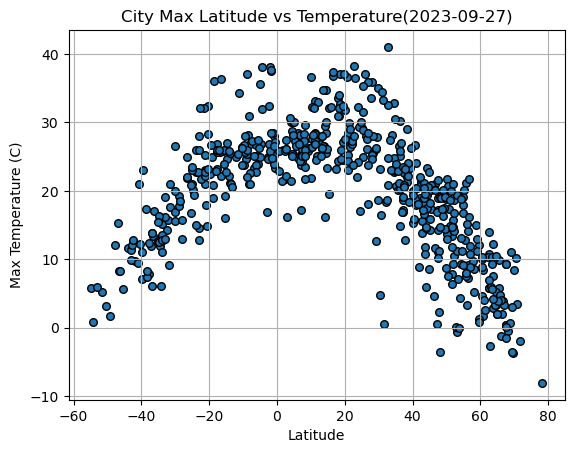

In [80]:
# Build scatter plot for latitude vs. temperature
import datetime as dt
city_data_df.plot('Lat', 'Max Temp', kind = 'scatter', grid = True, edgecolor = 'black', s = 30)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature' + '(' + str(dt.datetime.now().date()) + ')')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

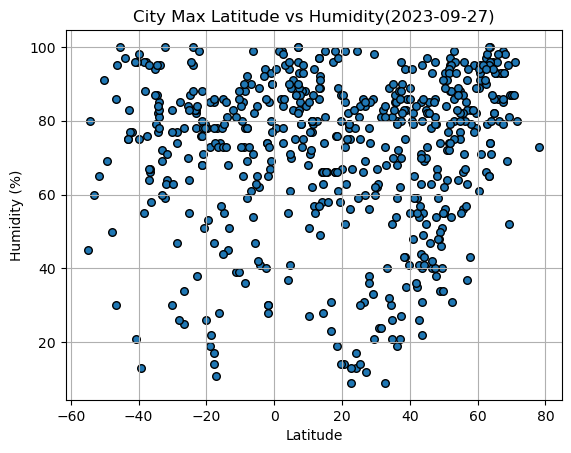

In [81]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat', 'Humidity', kind = 'scatter', grid = True, edgecolor = 'black', s = 30)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs Humidity' + '(' + str(dt.datetime.now().date()) + ')')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

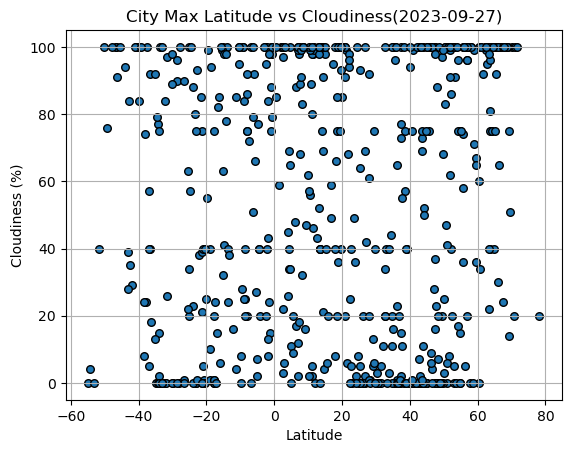

In [82]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat', 'Cloudiness', kind = 'scatter', grid = True, edgecolor = 'black', s = 30)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs Cloudiness' + '(' + str(dt.datetime.now().date()) + ')')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

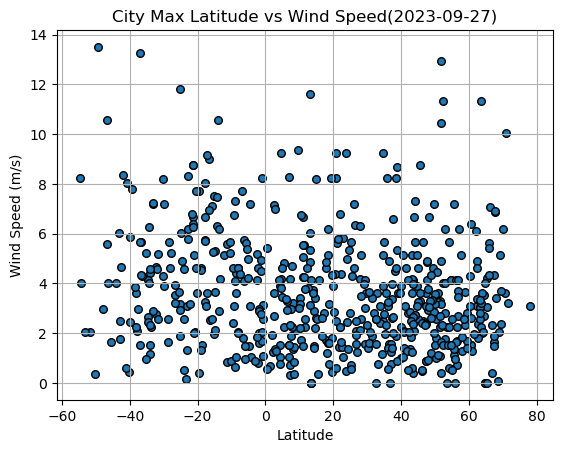

In [83]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat', 'Wind Speed', kind = 'scatter', grid = True, edgecolor = 'black', s = 30)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs Wind Speed' + '(' + str(dt.datetime.now().date()) + ')')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [295]:
# Define a function to create Linear Regression plots

def lin_regress(data, col1, col2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data[col1], data[col2])
    regress_values = data[col1] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(data[col1], data[col2])
    if slope > 0:
        plt.annotate(line_eq,(np.median(data[col1]), intercept-(intercept/2)), fontsize=15,color="red")
    elif slope < 0:
        plt.annotate(line_eq,(np.median(data[col1])-5,intercept+6),fontsize=15,color="red")            
    plt.plot(data[col1], regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(col2)
    print(f"The r-value is: {rvalue}")
    print(f"The r squared-value is: {rvalue**2}")
    plt.show()


In [106]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,maloye ganyushkino,46.6000,49.2667,20.98,40,4,2.48,KZ,1695846256
3,agat village,13.3886,144.6585,26.52,92,40,0.00,GU,1695846256
4,berezna,51.5716,31.7846,13.39,74,8,3.28,UA,1695846256
5,ribeira grande,38.5167,-28.7000,23.22,94,75,8.23,PT,1695846256
7,koulikoro,14.0000,-7.7500,26.61,66,100,3.73,ML,1695846256


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kasane,-17.8167,25.1500,23.21,17,0,3.26,BW,1695846255
2,beaufort west,-32.3567,22.5830,14.21,59,0,4.65,ZA,1695846256
6,puerto ayora,-0.7393,-90.3518,27.98,90,79,3.13,EC,1695846256
9,walvis bay,-22.9575,14.5053,14.53,82,0,6.17,NaN,1695846257
11,hermanus,-34.4187,19.2345,12.99,82,0,6.25,ZA,1695846257


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7900237113294396
The r squared-value is: 0.6241374644627418


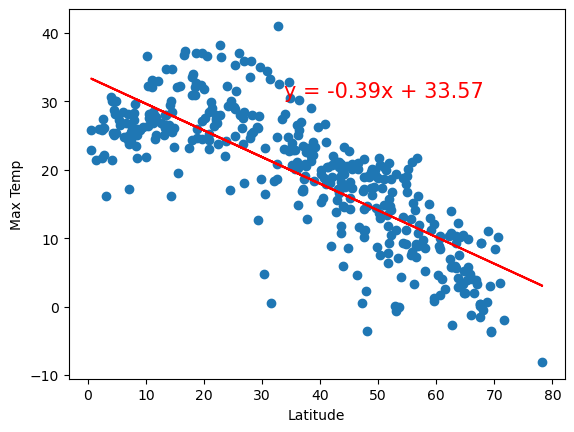

In [277]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df,'Lat', 'Max Temp')

The r-value is: 0.8140705547669557
The r squared-value is: 0.6627108681385789


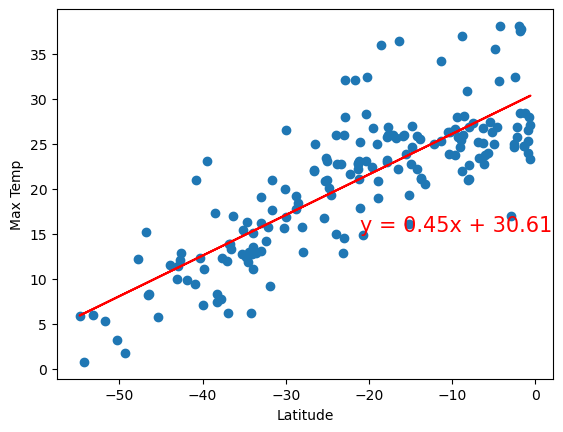

In [278]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df,'Lat', 'Max Temp')

**Discussion about the linear relationship:**

There is strong correlation between Latitude and Max Temperature. The Northern Hemisphere rvalue shows an approximate rvalue = -0.8 correlation which means Latitude and Max Temperature are negatively correlated i.e.) the higher in Latitude one goes, the lower the temperature.

Conversely, the Southern Hemisphere has a positive correlation with an approximate rvalue = 0.81. This means the higher in Latitude one goes, the higher the Max Temperature.

Both of these make sense as in the Northern Hemisphere, higher Latitude means going away from the equator, the hottest point on Earth while in the Southern Hemisphere, the higher Latitude means going towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09907778010486047
The r squared-value is: 0.009816406510507086


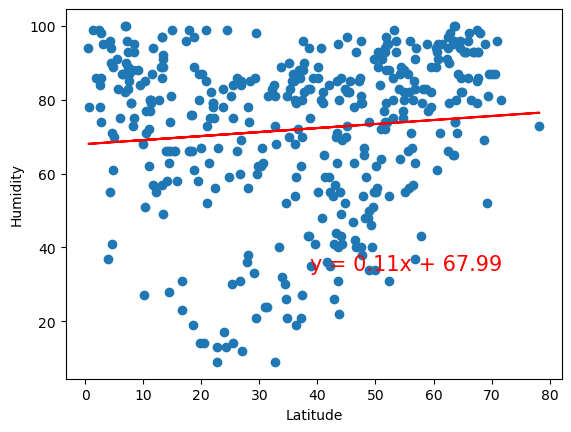

In [279]:
# Northern Hemisphere
lin_regress(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: -0.08433572864942025
The r squared-value is: 0.007112515126828644


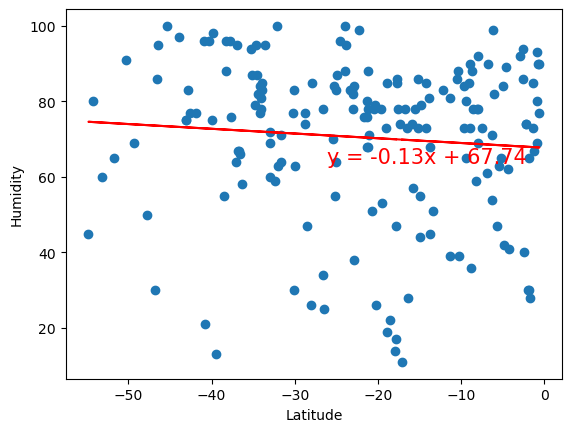

In [282]:
# Southern Hemisphere
lin_regress(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:**

There is minimal correlation between Latitude and Humidity. The rvalue is near 0 for both Northern and Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10126082485180726
The r squared-value is: 0.010253754649668387


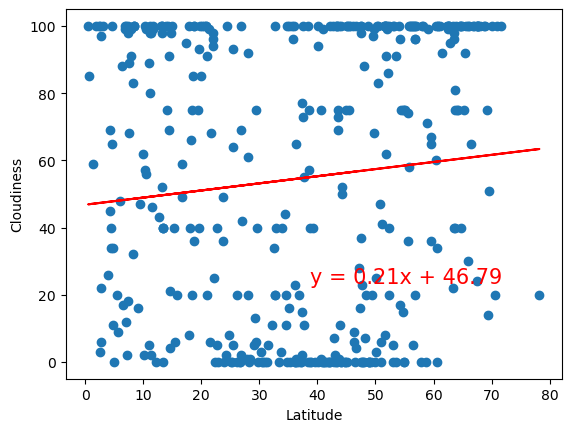

In [283]:
# Northern Hemisphere
lin_regress(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.050062526642319645
The r squared-value is: 0.0025062565738129643


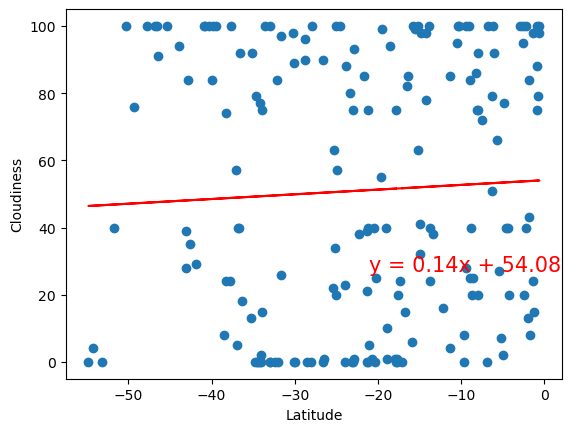

In [284]:
# Southern Hemisphere
lin_regress(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:**

There is minimal correlation between Latitude and Cloudiness. The rvalue is near 0 for both Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.011188517592420016
The r squared-value is: 0.00012518292591589218


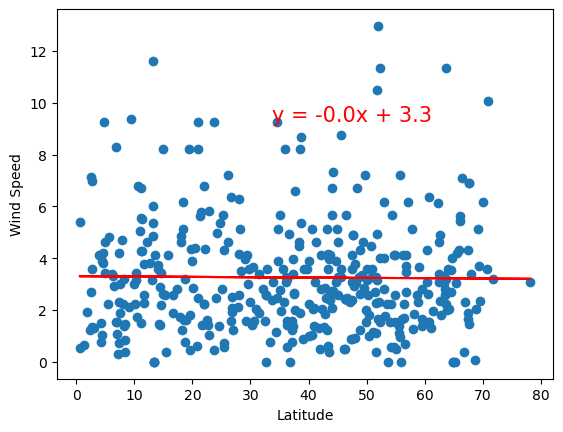

In [296]:
# Northern Hemisphere
lin_regress(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: -0.10544744172736266
The r squared-value is: 0.011119162966845543


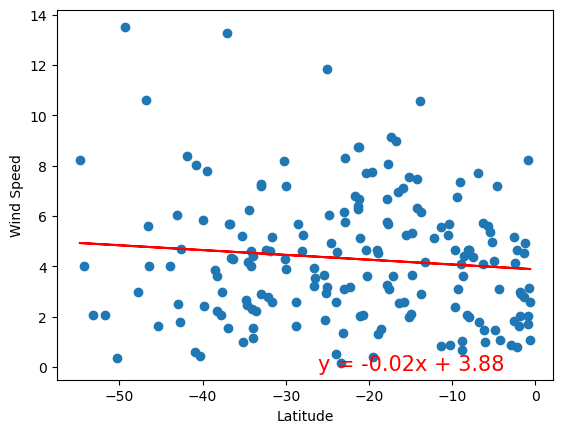

In [286]:
# Southern Hemisphere
lin_regress(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:**

There is minimal correlation between Latitude and Wind Speed. The rvalue for both Northern and Southern hemisphere is near 0.